# Running a specific diagnostic in a notebook

The goal of this notebook is to expand the functionality to run recipes directly from the notebook. Specifically, it demonstrates the API to list, run, and re-run a specific diagnostic in a notebook.

See associated PR here: https://github.com/ESMValGroup/ESMValCore/pull/962

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from esmvalcore.experimental import CFG

/home/stef/r/esmvalcore/esmvalcore/experimental/_warnings.py:18: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:254: ESMValToolDeprecationWarning: `write_plots` will be removed in 2.2.0.
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:255: ESMValToolDeprecationWarning: `write_netcdf` will be removed in 2.2.0.
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:256: ESMValToolDeprecationWarning: `output_file_type` will be removed in 2.2.0.


## Getting a recipe

Recipes can be obtained by their name, similar to what one may already be familiar with through `esmvaltool recipes list`. To do so, use `get_recipe`.

In [3]:
from esmvalcore.experimental import get_recipe, CFG

recipe = get_recipe('examples/recipe_python.yml')
recipe

## Recipe python

Example recipe that plots a map and timeseries of temperature.

### Authors
 - Bouwe Andela (NLeSC, Netherlands; https://orcid.org/0000-0001-9005-8940)
 - Mattia Righi (DLR, Germany; https://orcid.org/0000-0003-3827-5950)

### Maintainers
 - Manuel Schlund (DLR, Germany; https://orcid.org/0000-0001-5251-0158)

### Projects
 - DLR project ESMVal
 - Copernicus Climate Change Service 34a Lot 2 (MAGIC) project

### References
 - Please acknowledge the project\(s\)\.


## Running a single diagnostic

This recipe contains 5 tasks:

Preprocessors:
- `timeseries/tas_amsterdam`
- `timeseries/script1`
- `map/tas`

Diagnostics:
- `timeseries/tas_global`
- `map/script1`

To run a single preprocessor, specify the name of the task as an argument in `.run`. For example, to run the `map/script1` diagnostic only:

In [4]:
output = recipe.run(task='map/script1')

{'auxiliary_data_dir': PosixPath('/home/stef/auxiliary_data'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/stef/.esmvaltool/config-user.yml'),
 'diagnostics': {'map/script1'},
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'info',
 'max_parallel_tasks': None,
 'output_dir': PosixPath('/home/stef/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210127_125039/plots'),
 'preproc_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210127_125039/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'CMIP5': [PosixPath('/home/stef/data')],
              'CMIP6': [PosixPath('/home/stef/data'),
                        PosixPath('/home/stef/r/esmvaltool_sample_data/esmvaltool_sample_data/data/timeseries/CMIP6')],
              'default': [PosixPath('/home/stef/data')]},
 'run_dir': PosixPath('/hom

In [5]:
output

map/script1:
  ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
  ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png')
  DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')
  DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')

Show the output:

ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
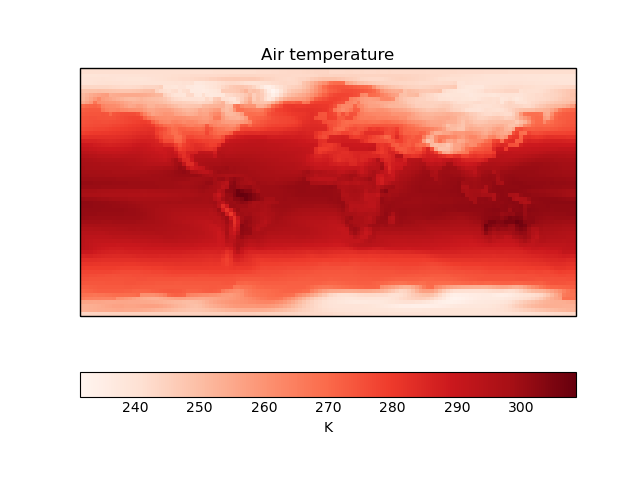

In [6]:
output['map/script1'].image_files[0]

## Running a single preprocessor

The API also makes it possible to run a single preprocessor, e.g. to just run the preprocessor to access the data for `map/script`, use:

In [7]:
output = recipe.run(task='map/tas')

{'auxiliary_data_dir': PosixPath('/home/stef/auxiliary_data'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/stef/.esmvaltool/config-user.yml'),
 'diagnostics': {'map/tas'},
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'info',
 'max_parallel_tasks': None,
 'output_dir': PosixPath('/home/stef/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210127_125052/plots'),
 'preproc_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210127_125052/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'CMIP5': [PosixPath('/home/stef/data')],
              'CMIP6': [PosixPath('/home/stef/data'),
                        PosixPath('/home/stef/r/esmvaltool_sample_data/esmvaltool_sample_data/data/timeseries/CMIP6')],
              'default': [PosixPath('/home/stef/data')]},
 'run_dir': PosixPath('/home/st

In [8]:
output

map/tas:
  DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')
  DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')

In [10]:
data = output['map/tas'].data_files[1]
cubes = data.load_iris()
cubes[0]

<iris 'Cube' of air_temperature / (K) (latitude: 64; longitude: 128)>